<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/numpy/december-15-2023-sklearn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!wget https://raw.githubusercontent.com/mumtehaartun/pandas/0c528a8711fd59ee166c4e507ac8b219074019ed/housing_price_dataset.csv

--2023-12-15 14:12:19--  https://raw.githubusercontent.com/mumtehaartun/pandas/0c528a8711fd59ee166c4e507ac8b219074019ed/housing_price_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1944010 (1.9M) [text/plain]
Saving to: ‘housing_price_dataset.csv.2’

housing_price_datas 100%[===================>]   1.85M  --.-KB/s    in 0.06s   

2023-12-15 14:12:19 (33.5 MB/s) - ‘housing_price_dataset.csv.2’ saved [1944010/1944010]



In [51]:
!ls

housing_price_dataset.csv  housing_price_dataset.csv.1	housing_price_dataset.csv.2  sample_data


In [52]:
import pandas as pd

df = pd.read_csv('housing_price_dataset.csv')

print(df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#columns_to_encode = ['Neighborhood']

df = pd.read_csv('housing_price_dataset.csv')


# hypothese is neighborhood positively correlated with price

#data_encoded = pd.get_dummies(data, columns=columns_to_encode)



            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.002638  -0.003275   0.000482  0.750720
Bedrooms     -0.002638  1.000000   0.007405   0.003147  0.072624
Bathrooms    -0.003275  0.007405   1.000000   0.003748  0.028418
YearBuilt     0.000482  0.003147   0.003748   1.000000 -0.002288
Price         0.750720  0.072624   0.028418  -0.002288  1.000000


<ipython-input-54-081011065436>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-54-081011065436>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


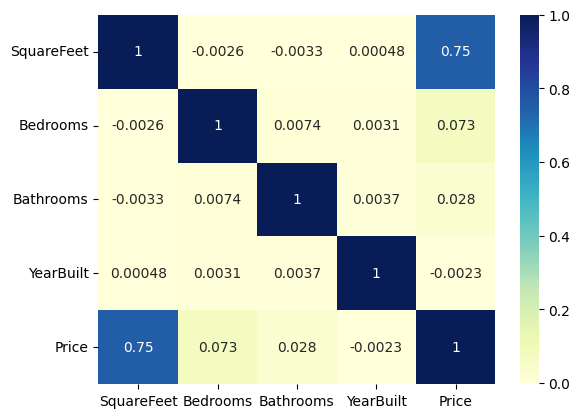

In [54]:
import matplotlib.pyplot as mp
import seaborn as sb

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


In [55]:
# we want to convert neighborhood which categorical to a number


In [65]:
#X = data_encoded.drop('Price', axis=1)
#y = data_encoded['Price']

X = df['SquareFeet']
y = df['Price']

data = pd.DataFrame(data=np.column_stack([X, y]), columns=['X', 'y'])


X_train, X_test, y_train, y_test = train_test_split(data['X'].values.reshape(-1, 1), data['y'].values, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('Score: \n', reg.score(X_test, y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [99.3462242]
Intercept: 
 25511.1905987591
Score: 
 0.5703289305615942
Mean squared error: 2466291899.58
Coefficient of determination: 0.57


In [66]:
data

,X,y
0,2126.0,215355.283618
1,2459.0,195014.221626
2,1860.0,306891.012076
3,2294.0,206786.787153
4,2130.0,272436.239065
...,...,...
49995,1282.0,100080.865895
49996,2854.0,374507.656727
49997,2979.0,384110.555590
49998,2596.0,380512.685957


In [ ]:
data_encoded.columns

In [ ]:
y_test.shape

In [ ]:
'''
plt.scatter(X_test, y_test, color='brown', label='Test Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('X', color='green')
plt.ylabel('y', color='purple')
plt.title('Linear Regression Analysis', color='cyan')
plt.legend()
plt.show()
'''

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)


# Below is simple X-Y regression

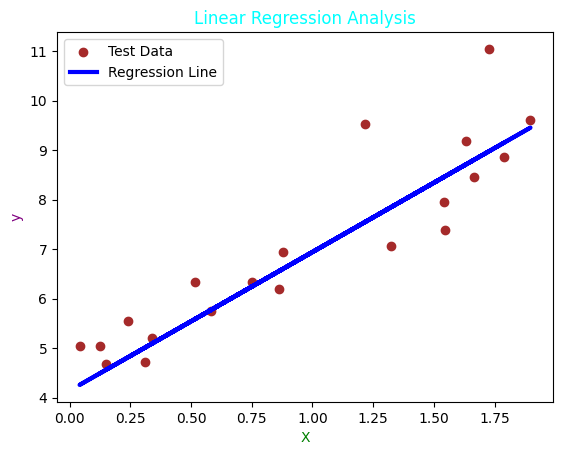

Model Coefficients: [2.79932366]
Model Intercept: 4.142913319458566
Mean Squared Error: 0.6536995137170021
Root Mean Squared Error: 0.8085168605026132
R-squared: 0.8072059636181392


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

data = pd.DataFrame(data=np.column_stack([X, y]), columns=['X', 'y'])

X_train, X_test, y_train, y_test = train_test_split(data['X'].values.reshape(-1, 1), data['y'].values, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

plt.scatter(X_test, y_test, color='brown', label='Test Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('X', color='green')
plt.ylabel('y', color='purple')
plt.title('Linear Regression Analysis', color='cyan')
plt.legend()
plt.show()

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

In [59]:
data['X'].values.reshape(-1, 1)

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

# demographic information determines salaries

* do the same thing with another data but use scikit-learn logistic regression instead of linear regression.

* this gives you probability.  like given age, education, etc., what is the probablity of 1.  what is the probability of 0.

* income is a multiple regression

* income is a factor of education, race,

use this dataset which needs you to convert all columns to numbers https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


In [ ]:
age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [70]:
# this converts categorical data into integers

categorical_data = np.array(df['Neighborhood'])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#x = ['Apple', 'Orange', 'Apple', 'Pear']
y = label_encoder.fit_transform(categorical_data)
print(y)


[0 0 1 ... 1 0 0]
